In [1]:
'''
Segment the OASIS brain data set with an Improved UNet.

@author Aghnia Prawira (45610240)
'''

import data_processing as dp
import improved_unet as iu
from importlib import reload
reload(dp)
reload(iu)

import os
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Tensorflow version: 2.1.0
Tensorflow version: 2.1.0


In [2]:
dp.test()
iu.test()

Testing data processing.
Testing improved unet.


In [3]:
# Set path to dataset
dataset_path = "keras_png_slices_data/"

seg_test_path = dataset_path + "keras_png_slices_seg_test/"
seg_train_path = dataset_path + "keras_png_slices_seg_train/"
seg_val_path = dataset_path + "keras_png_slices_seg_validate/"
test_path = dataset_path + "keras_png_slices_test/"
train_path = dataset_path + "keras_png_slices_train/"
val_path = dataset_path + "keras_png_slices_validate/"

In [4]:
# Load images
reload(dp)
seg_test = dp.load_seg(seg_test_path)
seg_train = dp.load_seg(seg_train_path)
seg_val = dp.load_seg(seg_val_path)
test = dp.load_image(test_path)
train = dp.load_image(train_path)
val = dp.load_image(val_path)

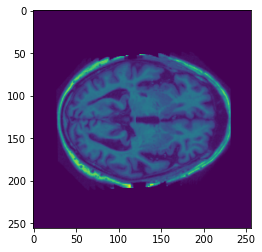

In [5]:
plt.imshow(test[0])

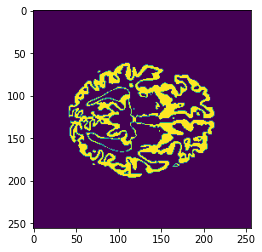

In [6]:
plt.imshow(seg_test[0][:,:,2])

In [7]:
print(np.array(train).shape)
print(np.array(seg_train).shape)

(200, 256, 256, 1)
(200, 256, 256, 4)


In [8]:
reload(iu)
# Generate improved unet model
model = iu.unet()

Tensorflow version: 2.1.0
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 256, 256, 16) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 16) 2320        leaky_re_lu_1[0][0]              
__________________________________________________________________

In [9]:
# Compile the model
reload(iu)
model.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=[iu.dice_coefficient_avg])

# model.compile(optimizer='adam', 
#               loss=iu.dice_loss, metrics=[iu.dice_coefficient_avg])

Tensorflow version: 2.1.0


In [10]:
# Train the model
history = model.fit(np.array(train), np.array(seg_train), 
                    batch_size=32, epochs=50, 
                    validation_data=(np.array(val), np.array(seg_val)))

Train on 200 samples, validate on 200 samples
Epoch 1/50
200/200 [==============================] - 9s 47ms/step - loss: 0.5538 - dice_coefficient_avg: 0.2612 - val_loss: 0.5286 - val_dice_coefficient_avg: 0.3108
Epoch 2/50
200/200 [==============================] - 2s 12ms/step - loss: 0.5077 - dice_coefficient_avg: 0.3179 - val_loss: 0.4755 - val_dice_coefficient_avg: 0.3377
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 0.4394 - dice_coefficient_avg: 0.3965 - val_loss: 0.2956 - val_dice_coefficient_avg: 0.5733
Epoch 4/50
200/200 [==============================] - 2s 12ms/step - loss: 0.2007 - dice_coefficient_avg: 0.7615 - val_loss: 0.1514 - val_dice_coefficient_avg: 0.7998
Epoch 5/50
200/200 [==============================] - 2s 12ms/step - loss: 0.1446 - dice_coefficient_avg: 0.8106 - val_loss: 0.1384 - val_dice_coefficient_avg: 0.8214
Epoch 6/50
200/200 [==============================] - 2s 12ms/step - loss: 0.1309 - dice_coefficient_avg: 0.8308 - val_

200/200 [==============================] - 2s 12ms/step - loss: 0.0257 - dice_coefficient_avg: 0.9672 - val_loss: 0.0389 - val_dice_coefficient_avg: 0.9619
Epoch 50/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0252 - dice_coefficient_avg: 0.9691 - val_loss: 0.0396 - val_dice_coefficient_avg: 0.9631


In [11]:
test_loss, test_acc = model.evaluate(np.array(test), np.array(seg_test), verbose=2)
print(test_acc)

0.9645227789878845


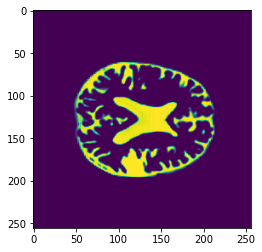

In [24]:
prediction = model.predict(np.array(test))
plt.imshow(prediction[15][:,:,1])

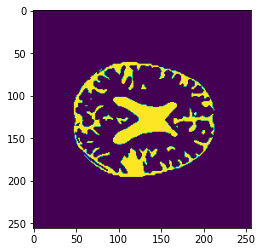

In [25]:
plt.imshow(seg_test[15][:,:,1])

In [14]:
reload(iu)
print(iu.dice_loss(np.array(seg_test), np.array(prediction)))
print(iu.dice_coefficient(np.array(seg_test), np.array(prediction)))

Tensorflow version: 2.1.0
tf.Tensor(0.034829855, shape=(), dtype=float32)
tf.Tensor(
[0.9555769  0.95527846 0.9604982  0.96140945 0.96257085 0.9624902
 0.9617819  0.961961   0.96221995 0.9609896  0.9594361  0.95955527
 0.95727414 0.9603221  0.9611585  0.9613524  0.9613671  0.9615213
 0.96348125 0.9635765  0.9654347  0.96628064 0.9657791  0.95851636
 0.9660167  0.96679085 0.9585545  0.958986   0.9612413  0.96126956
 0.96082556 0.95925134 0.96983206 0.9683998  0.96826595 0.96679735
 0.96766484 0.9678267  0.9670791  0.9662669  0.96499836 0.9653855
 0.966528   0.9674396  0.96779424 0.9680628  0.96707106 0.966331
 0.96838385 0.9698534  0.96724874 0.96891785 0.9685958  0.96996135
 0.9688648  0.96624494 0.9688146  0.9664569  0.96665466 0.96767545
 0.9684338  0.9679564  0.96686316 0.96792376 0.9670449  0.9677335
 0.9678519  0.9674357  0.9655941  0.96540827 0.9676021  0.96880126
 0.9696914  0.96934307 0.970942   0.9718108  0.9679867  0.97073907
 0.97063076 0.9692934  0.96845514 0.9686899  0.968